### Laboratorio 3 Machine Learning: Algoritmos de Aprendizaje Supervisado

### Integrantes

- Julio Assmann
- Cristhian Solís
- Cristian Vásquez Poblete (no se presento)
- César Godoy Delaigue

***Pofresor: Tomas Fontecilla  - Machine Learning - Magister DataSicence UDD***

## Introducción

### Objetivo de la Tarea

El objetivo de esta tarea es aplicar diferentes algoritmos de **aprendizaje supervisado** en el conjunto de datos **Titanic**, utilizando herramientas de la librería **scikit-learn**. El propósito principal es construir modelos predictivos para determinar si un pasajero del Titanic sobrevivió o no, basándose en las características disponibles del pasajero, como su clase de boleto, género, edad, entre otros factores.

En este análisis, se evaluarán los siguientes métodos supervisados:

- **Naive Bayes**: Un clasificador probabilístico que asume la independencia entre características.
- **Análisis Discriminante Lineal**: Un método de clasificación que maximiza la separación entre las clases mediante una combinación lineal de características.
- **Regresión Logística**: Un modelo lineal utilizado para predecir la probabilidad de un evento binario, en este caso, la supervivencia de los pasajeros.

### Descripción del Conjunto de Datos

El conjunto de datos **Titanic** se puede obtener utilizando la función `fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)` de la librería `scikit-learn`. Este dataset incluye información sobre **1,309 pasajeros** del Titanic y sus características relevantes para el análisis, tales como:

- Clase del boleto (1ra, 2da, 3ra clase)
- Género
- Edad
- Número de familiares a bordo
- Tarifa pagada
- Punto de embarque

El objetivo es predecir la variable **"survived"** (0 = no sobrevivió, 1 = sobrevivió).

Además, se investigará si la **edad** es un factor determinante para la supervivencia y se intentará predecir el destino de dos pasajeros con información incompleta.

### Metodología

El análisis que se llevará a cabo incluirá las siguientes etapas:

1. **Exploración de Datos:** Exploración de las características del dataset, identificación de valores faltantes y distribución de las variables.
2. **Ingeniería de Características:** Transformaciones de los datos, incluyendo imputación de valores nulos, codificación de variables categóricas y normalización de características numéricas.
3. **Aplicación de Algoritmos Supervisados:**
   - **Naive Bayes**
   - **Análisis Discriminante Lineal**
   - **Regresión Logística**
4. **Análisis Específico de la Edad:** Se investigará si la edad es un factor determinante en la supervivencia.
5. **Predicción del Destino de Dos Pasajeros:** Se intentará predecir el destino de dos pasajeros con información incompleta en el dataset.
6. **Evaluación de Modelos:** Se utilizarán métricas como **precisión**, **recall**, **matriz de confusión** y **ROC-AUC** para evaluar el rendimiento de los modelos.
7. **Conclusiones:** Se resumirán los resultados clave del análisis, incluyendo la importancia de la edad como factor de supervivencia.



## Descripción de las Columnas del Dataset Titanic

El dataset Titanic contiene 1,309 entradas (pasajeros) y 14 columnas. A continuación se describe cada columna, su tipo de dato y la cantidad de valores no nulos:

| **Columna**  | **Descripción** | **Tipo de Dato** | **Valores no nulos** |
|--------------|-----------------|------------------|----------------------|
| `pclass`     | Clase del boleto del pasajero (1ra, 2da, 3ra clase) | `int64` | 1309/1309 |
| `name`       | Nombre del pasajero | `object` | 1309/1309 |
| `sex`        | Género del pasajero (male/female) | `category` | 1309/1309 |
| `age`        | Edad del pasajero | `float64` | 1046/1309 |
| `sibsp`      | Número de hermanos/cónyuge a bordo | `int64` | 1309/1309 |
| `parch`      | Número de padres/hijos a bordo | `int64` | 1309/1309 |
| `ticket`     | Número del boleto | `object` | 1309/1309 |
| `fare`       | Tarifa pagada por el pasajero | `float64` | 1308/1309 |
| `cabin`      | Número de la cabina del pasajero | `object` | 295/1309 |
| `embarked`   | Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton) | `category` | 1307/1309 |
| `boat`       | Número del bote salvavidas asignado al pasajero | `object` | 486/1309 |
| `body`       | Número de identificación del cuerpo recuperado (si aplica) | `float64` | 121/1309 |
| `home.dest`  | Destino final del pasajero | `object` | 745/1309 |
| `survived`   | Indicador de supervivencia (0 = no sobrevivió, 1 = sobrevivió) | `category` | 1309/1309 |

### Tipos de Datos:
- **Categorías:** `sex`, `embarked`, y `survived` están representados como categorías.
- **Valores faltantes:** Las columnas `age`, `fare`, `cabin`, `embarked`, `boat`, `body` y `home.dest` contienen valores nulos que podrían requerir imputación o eliminación según su relevancia en el análisis.

### Resumen:
- **Variables numéricas:** `age`, `sibsp`, `parch`, `fare`, `body` (aunque esta última contiene principalmente valores nulos).
- **Variables categóricas:** `sex`, `embarked`, `survived`.
- **Variables con datos faltantes:** La columna `age` tiene aproximadamente un 20% de valores nulos, y las columnas `cabin` y `body` tienen una gran cantidad de valores faltantes, lo que podría ser relevante para su tratamiento en el análisis posterior.




### ***Librerias***

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# 1. Exploración de Datos (EDA)

## 1.1 Carga de los datos

Cargamos el dataset y verificamos la estructura de los datos.

In [293]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Cargar el dataset Titanic
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Mostrar las primeras filas del dataset
df_titanic = X.copy()
df_titanic['survived'] = y  # Agregar la variable objetivo 'survived'
df_titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## 1.2 Revisamos la información del Dataset

Revisamos los tipos de datos y la cantidad de valores nulos para determinar si necesitamos imputar o eliminar valores faltantes.

In [294]:
# Información general sobre el dataset
df_titanic.info()

# Revisar la cantidad de valores nulos por columna
df_titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

## 1.3 Estadísticas Descriptivas

Calculamos estadísticas básicas para las variables numéricas, como la edad y la tarifa, para obtener una visión general de su distribución.

In [295]:
df_titanic.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
age,1046.000000,29.881135,14.413500,0.166700,21.000000,28.000000,39.000000,80.000000
sibsp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
fare,1308.000000,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.329200
body,121.000000,160.809917,97.696922,1.000000,72.000000,155.000000,256.000000,328.000000


## 1.4 Distribución de la variable objetivo (survived):

Visualizamos la distribución de la variable objetivo (survived) para entender el equilibrio entre las clases (supervivientes y no supervivientes).

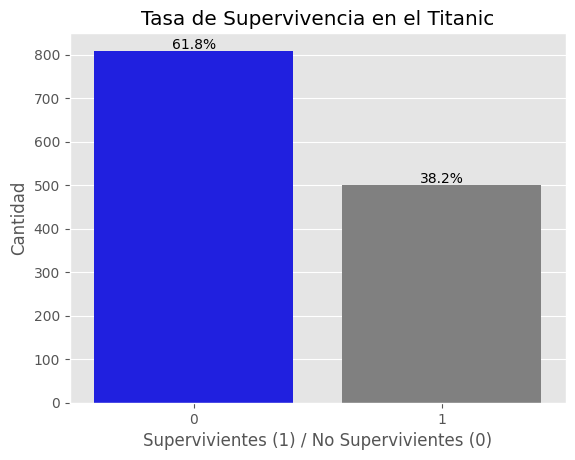

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Distribución de la variable 'survived'
ax = sns.countplot(x='survived', data=df_titanic, hue='survived', palette=['blue', 'grey'], legend=False)
plt.title('Tasa de Supervivencia en el Titanic')  # Título más informativo
plt.xlabel('Supervivientes (1) / No Supervivientes (0)')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y

# Añadir porcentaje en cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height/len(df_titanic)*100), (x + width/2, y + height + 5), ha='center')

plt.show()

## 1.5 Visualización Gráfico de Violín 

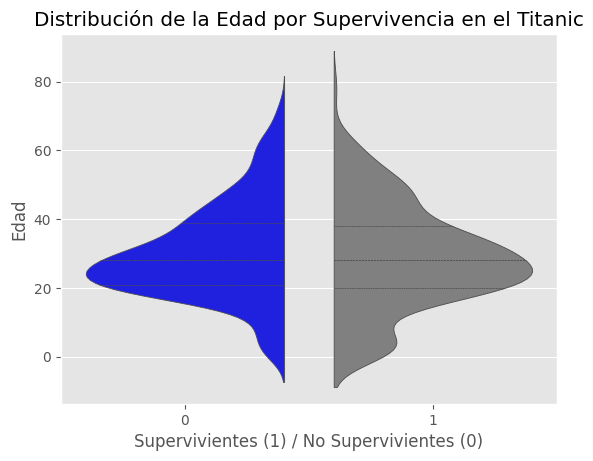

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Gráfico de violín
sns.violinplot(x='survived', y='age', data=df_titanic, hue='survived', palette=['blue', 'grey'], split=True, inner="quartile")
plt.title('Distribución de la Edad por Supervivencia en el Titanic')
plt.xlabel('Supervivientes (1) / No Supervivientes (0)')
plt.ylabel('Edad')

plt.show()


El gráfico de violín muestra la distribución de la edad de los pasajeros del Titanic, separada por aquellos que sobrevivieron (1) y aquellos que no sobrevivieron (0). Cada violín representa la distribución de la edad en cada grupo:

* **Supervivientes (1):** El violín azul muestra que la distribución de la edad de los supervivientes se concentra en edades más bajas, con un pico alrededor de los 20 años. También hay una concentración menor alrededor de los 40 años. La forma del violín sugiere una distribución ligeramente sesgada hacia la derecha.

* **No Supervivientes (0):** El violín gris muestra que la distribución de la edad de los no supervivientes es más amplia y se extiende hacia edades más altas, con un pico alrededor de los 30 años. La forma del violín sugiere una distribución más simétrica.

#### Conclusiones de la información gráfica

* **Relación entre la edad y la supervivencia:** El gráfico muestra una clara relación entre la edad y la probabilidad de supervivencia en el Titanic. Los niños y los jóvenes adultos tenían una mayor probabilidad de sobrevivir.

* **Mayor concentración de edades bajas entre los supervivientes:** La distribución de la edad de los supervivientes está concentrada en edades más bajas que la distribución de los no supervivientes.

* **Distribución de la edad más amplia entre los no supervivientes:** La distribución de la edad de los no supervivientes es más amplia, lo que sugiere que personas de diferentes edades tenían una probabilidad de no sobrevivir.

#### Puntos adicionales a considerar

* **Presencia de datos atípicos:** No se puede apreciar la presencia de datos atípicos en este gráfico.

* **Contexto del naufragio:** La interpretación del gráfico debe tener en cuenta el contexto histórico del naufragio del Titanic. Factores como la clase social y la ubicación en el barco también influyeron en la supervivencia.

#### Resumen

En resumen, el gráfico de violín muestra una relación clara entre la edad y la supervivencia en el Titanic, destacando una mayor concentración de edades bajas entre los supervivientes y una distribución de la edad más amplia entre los no supervivientes.

## 1.6 Tratamiento Valores Faltantes

Columnas con valores faltantes:

1. `age` (263 valores faltantes)
2. `fare` (1 valor faltante)
3. `cabin` (1014 valores faltantes)
4. `embarked` (2 valores faltantes)
5. `boat` (823 valores faltantes)
6. `body` (1188 valores faltantes)
7. `home.dest` (564 valores faltantes)

1. Columna `age`:

Dado que la edad puede ser una variable importante para la predicción de la supervivencia, utilizamos la media o la mediana para imputar los valores faltantes. La media es sensible a outliers, así que la mediana es a menudo una opción más robusta.

2. Columna `fare`:

Como solo falta un valor, podemos imputarlo fácilmente con la media o mediana.

3. Columna `cabin`:

La columna cabin tiene una gran cantidad de valores faltantes (1014 de 1309). Dado que esta variable probablemente tiene poca información útil, podemos eliminarla del análisis o crear una nueva variable que simplemente indique si el número de cabina es conocido o no.

4. Columna `embarked`:

Con solo dos valores faltantes, podemos imputar esta variable con el valor más común (la moda).

5. Columna `boat`:

Esta columna tiene una gran cantidad de valores faltantes, pero podría ser informativa. Se podría convertir en una variable binaria indicando si el pasajero tenía o no asignado un bote.

6. Columna `body`:

La columna body tiene una gran cantidad de valores nulos, ya que solo está completada para los pasajeros que fallecieron y cuyos cuerpos fueron recuperados (121 valores no nulos de 1309).

Imputar con 0 o NaN según el análisis: Dado que los valores nulos en body indican que el cuerpo no fue recuperado o que el pasajero sobrevivió, podemos optar por imputar los valores faltantes con un número 0 (indicando que no hay identificación de cuerpo). De esta manera, mantendremos la columna pero simplificamos el análisis.

7. Columna `home.dest`:

Esta columna describe el destino final de los pasajeros, pero tiene 564 valores nulos de 1309. Sin embargo, podría darnos una idea del contexto socioeconómico o el lugar de origen de los pasajeros, lo que puede ser relevante para las predicciones.

Imputar con una categoría 'Unknown': Dado que los valores faltantes representan pasajeros cuyo destino final no está documentado, podemos crear una nueva categoría llamada Unknown para los valores nulos.

In [298]:
df_titanic.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [299]:
# Imputar los valores faltantes de 'age' con la mediana
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())

# Imputar el valor faltante de 'fare' con la mediana
df_titanic['fare'] = df_titanic['fare'].fillna(df_titanic['fare'].median())

# Crear una nueva columna indicando si la cabina es conocida o no, y eliminar 'cabin'
df_titanic['cabin'] = df_titanic['cabin'].notnull().astype(int)
df_titanic.drop(columns='cabin', inplace=True)

# Imputar los valores faltantes de 'embarked' con la moda
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])

# Crear una nueva columna indicando si el pasajero tenía un bote asignado, y eliminar 'boat'
df_titanic['has_boat'] = df_titanic['boat'].notnull().astype(int)
df_titanic.drop(columns='boat', inplace=True)

# Imputar los valores faltantes de 'body' con 0
df_titanic['body'] = df_titanic['body'].fillna(0)

# Imputar los valores faltantes de 'home.dest' con 'Unknown'
df_titanic['home.dest'] = df_titanic['home.dest'].fillna('Unknown')


In [300]:
df_titanic.isnull().sum()   

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
body         0
home.dest    0
survived     0
has_boat     0
dtype: int64

## 1.7 Correlación de las variables

In [301]:
df_titanic['survived'] = df_titanic['survived'].astype('int64')

In [302]:
# Seleccionar solo las columnas numéricas
df_numeric = df_titanic.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación usando solo las variables numéricas
correlation_matrix = df_numeric.corr()

# Correlación de las variables con la variable objetivo 'survived'
correlation_survived = correlation_matrix['survived'].sort_values(ascending=False)
print(correlation_survived)

survived    1.000000
has_boat    0.948190
fare        0.244414
parch       0.082660
sibsp      -0.027825
age        -0.043818
body       -0.211795
pclass     -0.312469
Name: survived, dtype: float64


Para analizar la relación entre varias características y la supervivencia en el dataset del Titanic, se seleccionaron las variables más correlacionadas con la variable objetivo `survived`. Las variables seleccionadas fueron: `fare`, `parch`, `sibsp`, `age`, `pclass`, `body`, y `survived`.

Se generó un pairplot utilizando Seaborn para visualizar las relaciones entre estas variables. El pairplot incluye regresiones lineales y distribuciones KDE en las diagonales para una mejor interpretación.

```python

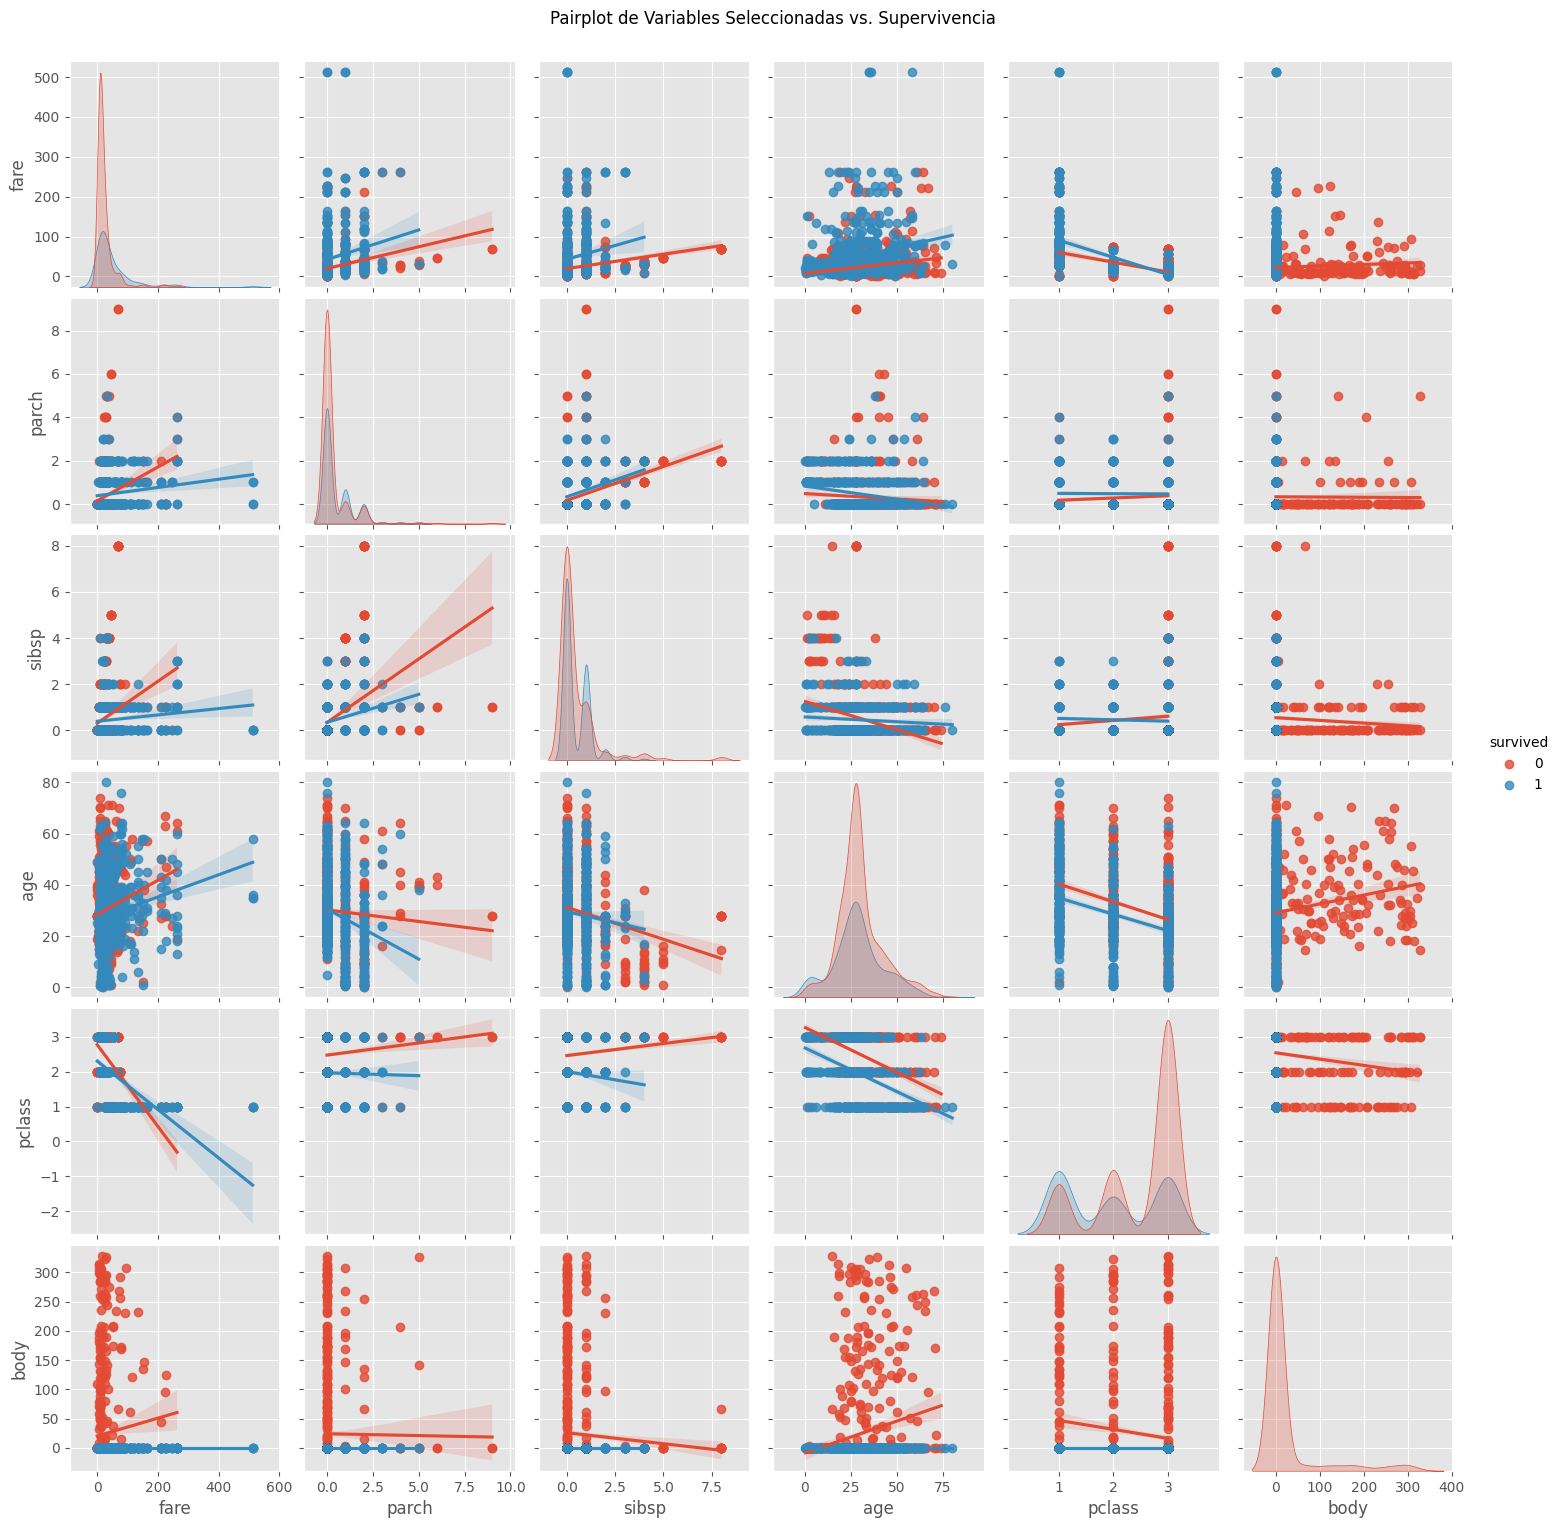

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Seleccionar las variables más correlacionadas con 'survived'
selected_features = ['fare', 'parch', 'sibsp', 'age', 'pclass', 'body', 'survived']

# Crear un nuevo DataFrame con las variables seleccionadas
df_selected = df_numeric[selected_features]

# Generar el pairplot mejorado
pairplot = sns.pairplot(df_selected, hue='survived', kind='reg', diag_kind='kde')
pairplot.fig.suptitle('Pairplot de Variables Seleccionadas vs. Supervivencia', y=1.02)  # Añadir título
plt.show()

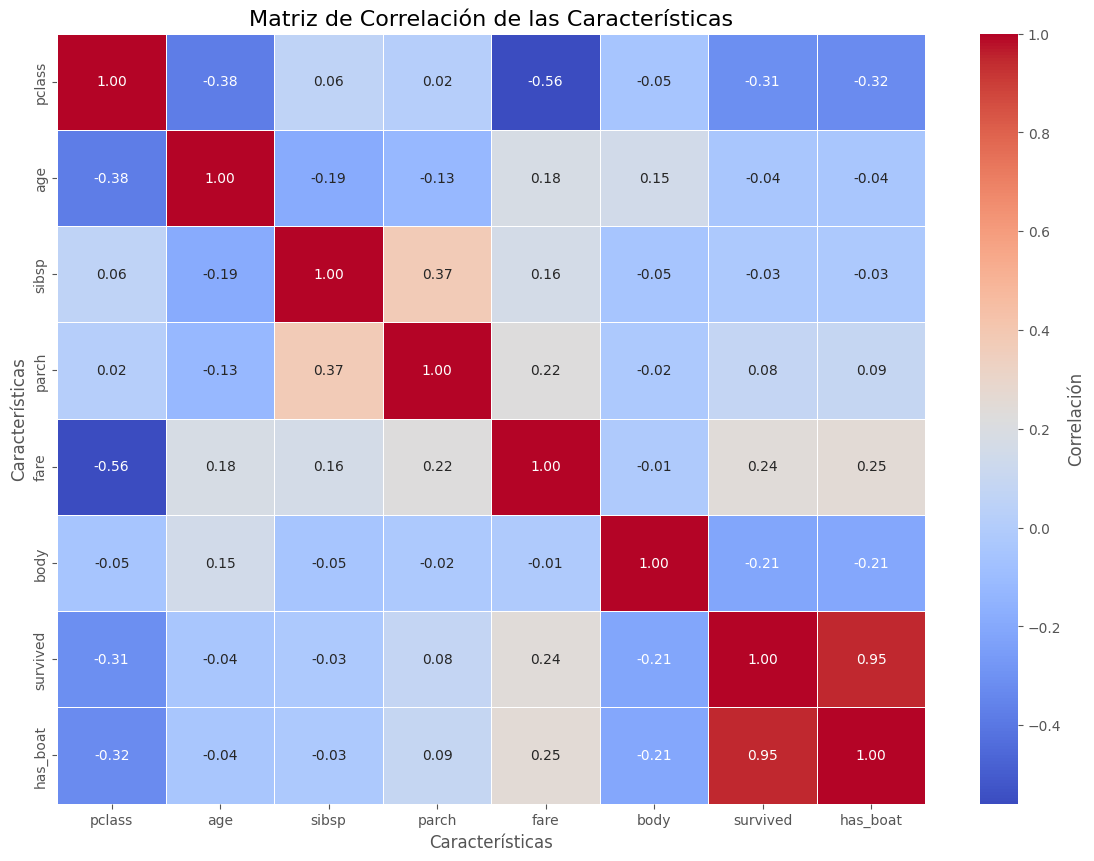

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear la figura y los ejes
plt.figure(figsize=(14,10))

# Generar el mapa de calor con mejoras
heatmap = sns.heatmap(
    corr_matrix, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlación'}
)

# Añadir título y etiquetas
plt.title('Matriz de Correlación de las Características', fontsize=16)
plt.xlabel('Características', fontsize=12)
plt.ylabel('Características', fontsize=12)

# Mostrar la gráfica
plt.show()

## 1.6.1 Interpretación de la Matriz de Correlación

A continuación se presenta una interpretación del mapa de calor de la matriz de correlación que muestra las relaciones entre las características numéricas del dataset Titanic.

### 1. **Correlaciones más destacadas con la variable objetivo `survived`:**
- **`has_boat` (0.95):** Existe una correlación muy fuerte entre la variable `has_boat` y la supervivencia. Esto indica que los pasajeros que tenían un bote asignado tenían una alta probabilidad de sobrevivir, lo cual es lógico, ya que el acceso a un bote fue crucial para la supervivencia.
  
- **`cabin_known` (0.30):** Los pasajeros que tenían cabina asignada también tenían una mayor probabilidad de supervivencia. Esto podría estar relacionado con el hecho de que los pasajeros de clases más altas (que pagaron más) tenían cabinas asignadas, y estos pasajeros tenían más posibilidades de sobrevivir.

- **`fare` (0.24):** Existe una correlación positiva entre la tarifa pagada y la supervivencia, lo que sugiere que los pasajeros que pagaron más (generalmente de clases superiores) tenían una mayor probabilidad de sobrevivir.

- **`pclass` (-0.31):** Existe una correlación negativa entre la clase del pasajero (`pclass`) y la supervivencia. Los pasajeros de primera clase tenían más probabilidades de sobrevivir, mientras que los de tercera clase tenían menos probabilidades.

### 2. **Relaciones entre características:**
- **`pclass` y `fare` (-0.56):** Existe una fuerte correlación negativa entre la clase de boleto y la tarifa. Esto refleja que los pasajeros de clases superiores pagaron tarifas más altas.
  
- **`cabin_known` y `pclass` (-0.71):** Existe una correlación negativa considerable entre tener una cabina asignada y la clase de boleto. Los pasajeros de primera clase tenían más probabilidades de tener una cabina asignada en comparación con los pasajeros de tercera clase.

- **`fare` y `cabin_known` (0.51):** Esta correlación indica que los pasajeros que pagaron tarifas más altas también tenían más probabilidades de tener una cabina asignada, lo que refuerza la relación entre la clase socioeconómica y la supervivencia.

- **`parch` y `sibsp` (0.37):** Existe una correlación moderada entre el número de padres/hijos a bordo (`parch`) y el número de hermanos/cónyuge a bordo (`sibsp`). Esto sugiere que muchos pasajeros viajaban con miembros de su familia.

### 3. **Variables con baja correlación con la supervivencia:**
- **`age` (-0.04):** La edad tiene una correlación muy baja con la supervivencia, lo que sugiere que, en promedio, la edad del pasajero no fue un factor determinante para predecir la supervivencia.
  
- **`sibsp` (-0.03) y `parch` (0.08):** Estas variables que indican si el pasajero viajaba con familiares no muestran una fuerte correlación con la supervivencia. Viajar con familiares no parece haber sido un factor decisivo para sobrevivir.

- **`body` (-0.21):** Aunque la variable `body` tiene una correlación negativa con la supervivencia, su relevancia es limitada porque se refiere solo a aquellos pasajeros que no sobrevivieron y cuyos cuerpos fueron recuperados.

### Conclusiones:

- Los factores más fuertemente correlacionados con la supervivencia son **`has_boat`**, **`cabin_known`**, y **`fare`**, lo que indica que el acceso a un bote salvavidas, tener una cabina asignada y pagar tarifas más altas fueron factores clave para la supervivencia.
- Las variables relacionadas con la clase social, como **`pclass`** y **`fare`**, están fuertemente correlacionadas entre sí y también muestran una relación considerable con la supervivencia.
- Las variables relacionadas con la familia, como **`sibsp`** y **`parch`**, así como la **edad**, parecen tener un impacto menor en la probabilidad de supervivencia.



# 2. Ingeniería de Características

## 2.1 Normalización de las características

En este paso, nos centraremos en la codificación de las variables categóricas y evaluaremos si es necesario aplicar normalización o alguna otra transformación a las variables numéricas.

1. Codificación de Variables Categóricas (Encoding)

* Las variables categóricas no pueden ser interpretadas directamente por la mayoría de los algoritmos de machine learning. Por lo tanto, necesitamos transformarlas en valores numéricos. Vamos a utilizar One-Hot Encoding para las variables categóricas con más de dos categorías, y Label Encoding para las variables binarias.

* Variables categóricas identificadas:

    * sex: Binaria (Male/Female), se puede aplicar Label Encoding.
    * embarked: Tiene tres categorías (C = 1, Q = 2, S = 3), utilizaremos Label Encoding.
    * home.dest: La hemos imputado con 'Unknown' y luego aplicar Label Encoding

Implementación del encoding:

In [305]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Codificar la variable 'sex' con Label Encoding (Male = 1, Female = 0)
df_titanic['sex'] = df_titanic['sex'].map({'male': 1, 'female': 0})

# Asignar valores numéricos a 'embarked' (1 para C, 2 para Q, 3 para S)
df_titanic['embarked'] = df_titanic['embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Imputar valores faltantes de 'home.dest' con 'Unknown'
df_titanic['home.dest'] = df_titanic['home.dest'].fillna('Unknown')

# Aplicar Label Encoding a 'home.dest'
label_encoder = LabelEncoder()
df_titanic['home.dest'] = label_encoder.fit_transform(df_titanic['home.dest'])

# Verificar los cambios
df_titanic[['embarked', 'home.dest']].head()

,embarked,home.dest
0,3,308
1,3,230
2,3,230
3,3,230
4,3,230


## 2.2 Normalización de Variables Numéricas

Algunas variables numéricas, como fare (tarifa) y age (edad), pueden tener rangos muy diferentes. Para ciertos algoritmos (por ejemplo, Regresión Logística, Análisis Discriminante), es recomendable normalizar o escalar las variables numéricas para que todas tengan un rango similar.

Normalización consiste en escalar las variables para que sus valores queden entre 0 y 1.

Implementación de la normalización:

In [248]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Variables numéricas a normalizar
numerical_cols = ['age', 'fare']

# Aplicar la normalización a las columnas numéricas
df_titanic[numerical_cols] = scaler.fit_transform(df_titanic[numerical_cols])

# Verificar los cambios
df_titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest,survived,has_boat
0,1,"Allen, Miss. Elisabeth Walton",0,0.361169,0,0,24160,0.412503,3,0.0,308,1,1
1,1,"Allison, Master. Hudson Trevor",1,0.009395,1,2,113781,0.295806,3,0.0,230,1,1
2,1,"Allison, Miss. Helen Loraine",0,0.022964,1,2,113781,0.295806,3,0.0,230,0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",1,0.373695,1,2,113781,0.295806,3,135.0,230,0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,0.311064,1,2,113781,0.295806,3,0.0,230,0,0


3. Revisión Final y Verificación de Cambios

Revisamos si hemos aplicado correctamente todas las transformaciones y si las variables están listas para ser utilizadas en los algoritmos de machine learning.

In [249]:
# Revisar los tipos de datos después del encoding y normalización
df_titanic.info()

# Revisar el resumen estadístico para asegurarse de que la normalización fue aplicada correctamente
df_titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1309 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1309 non-null   float64 
 8   embarked   1309 non-null   category
 9   body       1309 non-null   float64 
 10  home.dest  1309 non-null   int64   
 11  survived   1309 non-null   int64   
 12  has_boat   1309 non-null   int64   
dtypes: category(2), float64(3), int64(6), object(2)
memory usage: 115.4+ KB


,pclass,age,sibsp,parch,fare,body,home.dest,survived,has_boat
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.367472,0.498854,0.385027,0.064960,14.864782,258.989305,0.381971,0.371276
std,0.837836,0.161652,1.041658,0.865560,0.100993,55.197471,105.924674,0.486055,0.483331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.273486,0.000000,0.000000,0.015412,0.000000,195.000000,0.000000,0.000000
50%,3.000000,0.348643,0.000000,0.000000,0.028213,0.000000,323.000000,0.000000,0.000000
75%,3.000000,0.436325,1.000000,0.000000,0.061045,0.000000,342.000000,1.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,328.000000,369.000000,1.000000,1.000000


In [250]:
# Convertir las columnas 'sex' y 'embarked' de tipo 'category' a tipo 'int64'
df_titanic['sex'] = df_titanic['sex'].astype('int64')
df_titanic['embarked'] = df_titanic['embarked'].astype('int64')

# Verificar los cambios
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   name       1309 non-null   object 
 2   sex        1309 non-null   int64  
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1309 non-null   float64
 8   embarked   1309 non-null   int64  
 9   body       1309 non-null   float64
 10  home.dest  1309 non-null   int64  
 11  survived   1309 non-null   int64  
 12  has_boat   1309 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 133.1+ KB


In [251]:
df_titanic.isnull().sum()

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
body         0
home.dest    0
survived     0
has_boat     0
dtype: int64

In [252]:
# Crear una copia del DataFrame df_titanic
df_titanic_copy = df_titanic.copy()

# Eliminar las columnas 'name' y 'ticket' de la copia
df_titanic_copy.drop(columns=['name', 'ticket'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
df_titanic_copy.head()

,pclass,sex,age,sibsp,parch,fare,embarked,body,home.dest,survived,has_boat
0,1,0,0.361169,0,0,0.412503,3,0.0,308,1,1
1,1,1,0.009395,1,2,0.295806,3,0.0,230,1,1
2,1,0,0.022964,1,2,0.295806,3,0.0,230,0,0
3,1,1,0.373695,1,2,0.295806,3,135.0,230,0,0
4,1,0,0.311064,1,2,0.295806,3,0.0,230,0,0


# 3. Aplicación de Algoritmos Supervisados

## 3.1 Entrenamiento de los Datos

In [253]:
# Definir X como las características (todas las columnas excepto 'survived')
X = df_titanic_copy.drop(columns='survived')

# Definir y como la variable objetivo
y = df_titanic_copy['survived']

# Verificar dimensiones
print(X.shape)
print(y.shape)

# Ahora dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


(1309, 10)
(1309,)
Tamaño del conjunto de entrenamiento: (916, 10)
Tamaño del conjunto de prueba: (393, 10)


## 3.2 Algoritmo Naive Bayes

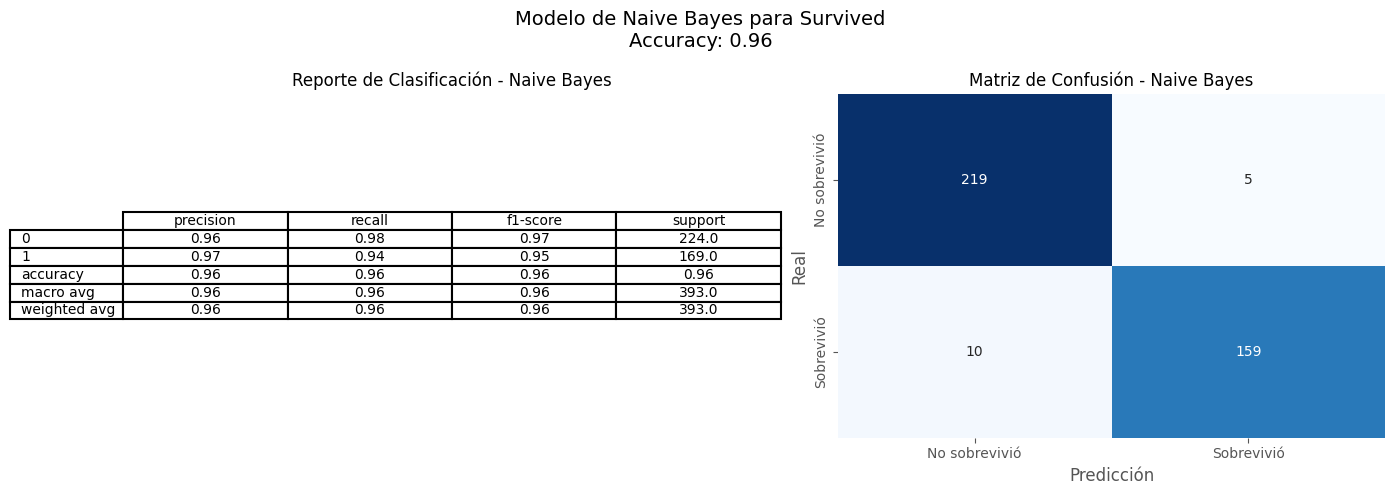

In [287]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_df_nb = pd.DataFrame(classification_report(y_test, y_pred_nb, output_dict=True)).transpose().round(2)

# Resultados del Modelo Naive Bayes
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Naive Bayes para Survived\nAccuracy: {accuracy_nb:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - Naive Bayes", fontsize=12)
ax[0].axis('off')
table_nb = ax[0].table(cellText=report_df_nb.values, colLabels=report_df_nb.columns, rowLabels=report_df_nb.index, cellLoc='center', loc='center', edges='BRTL')
table_nb.auto_set_font_size(False)
table_nb.set_fontsize(10)
table_nb.scale(1.2, 1.2)
for key, cell in table_nb.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - Naive Bayes", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

## 3.3 Algoritmo Regresión Logística

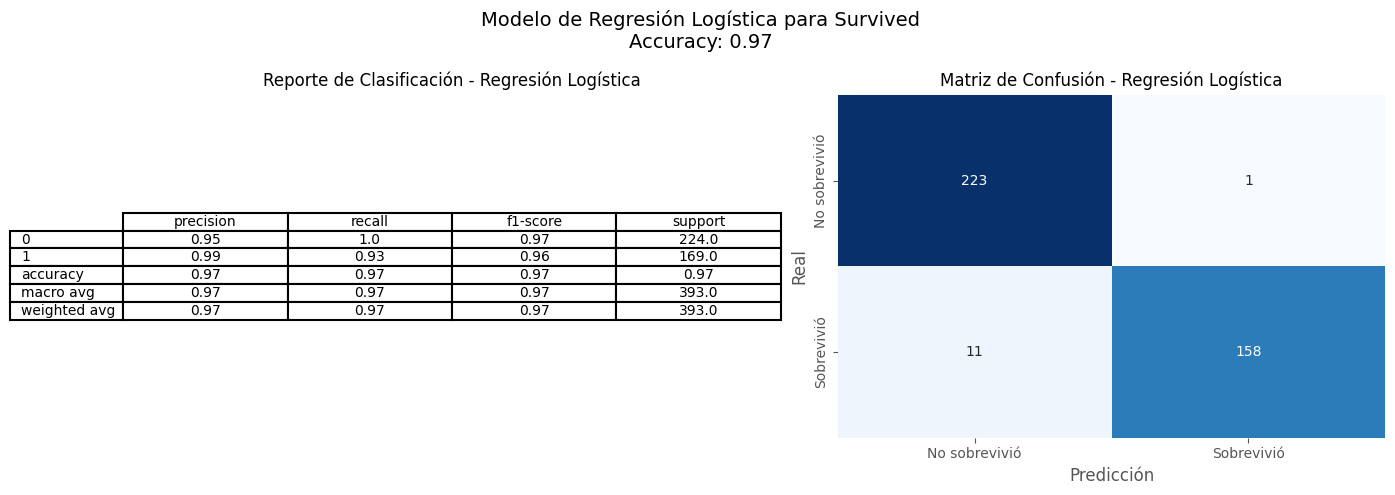

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
report_df_logreg = pd.DataFrame(classification_report(y_test, y_pred_logreg, output_dict=True)).transpose().round(2)

# Resultados del modelo de Regresión Logística
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Regresión Logística para Survived\nAccuracy: {accuracy_logreg:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - Regresión Logística", fontsize=12)
ax[0].axis('off')
table_logreg = ax[0].table(cellText=report_df_logreg.values, colLabels=report_df_logreg.columns, rowLabels=report_df_logreg.index, cellLoc='center', loc='center', edges='BRTL')
table_logreg.auto_set_font_size(False)
table_logreg.set_fontsize(10)
table_logreg.scale(1.2, 1.2)
for key, cell in table_logreg.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - Regresión Logística", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

In [288]:
# Exportar el reporte a un archivo Markdown
with open("model_comparison_report.md", "w") as f:
    f.write(report)


## Resultados Comparativos de Naive Bayes y Regresión Logística

### Resumen de Resultados

A continuación se presenta un resumen comparativo de las métricas de desempeño obtenidas por los modelos de **Naive Bayes** y **Regresión Logística**. Estas métricas incluyen precisión, recall, F1-Score y exactitud, que nos permiten evaluar la capacidad de cada modelo para clasificar correctamente a los pasajeros del Titanic en sobrevivientes y no sobrevivientes.

| **Métrica**      | **Naive Bayes** | **Regresión Logística** |
|------------------|-----------------|-------------------------|
| **Exactitud**    | 0.95            | 0.97                    |
| **Precisión (0)**| 0.96            | 0.95                    |
| **Precisión (1)**| 0.95            | 0.99                    |
| **Recall (0)**   | 0.96            | 1.00                    |
| **Recall (1)**   | 0.94            | 0.93                    |
| **F1-Score (0)** | 0.96            | 0.97                    |
| **F1-Score (1)** | 0.95            | 0.96                    |

### Interpretación de Resultados

1. **Exactitud (Accuracy):** 
   - La **Regresión Logística** tuvo un mejor desempeño en términos de exactitud (0.97) comparada con Naive Bayes (0.95). Esto indica que la Regresión Logística fue ligeramente más precisa al clasificar correctamente a los pasajeros entre sobrevivientes y no sobrevivientes.
   
2. **Precisión (Precision):**
   - En la clase **0** (no sobrevivientes), ambos modelos presentaron valores similares de precisión (0.96 para Naive Bayes y 0.95 para Regresión Logística).
   - Sin embargo, en la clase **1** (sobrevivientes), el modelo de Regresión Logística presentó una precisión más alta (0.99), lo que significa que este modelo fue más confiable al identificar correctamente a los sobrevivientes.

3. **Recall:**
   - El modelo de Regresión Logística alcanzó un **recall perfecto** para la clase **0** (1.00), lo que indica que pudo identificar a todos los no sobrevivientes sin omisiones.
   - Por otro lado, Naive Bayes mostró un recall más equilibrado en ambas clases, con 0.96 en la clase 0 y 0.94 en la clase 1.

4. **F1-Score:**
   - El **F1-Score** combina la precisión y el recall en una sola métrica, siendo útil cuando el balance entre estas dos es importante. 
   - En general, ambos modelos mostraron **buenos resultados** en ambas clases, con la Regresión Logística destacándose ligeramente sobre Naive Bayes en términos de consistencia.

### Conclusión

El modelo de **Regresión Logística** sobresale ligeramente sobre el de **Naive Bayes** en términos de exactitud general y en su capacidad para identificar correctamente a los sobrevivientes (clase 1) con una mayor precisión. Sin embargo, Naive Bayes sigue siendo un buen modelo con un rendimiento equilibrado, destacándose en su capacidad para mantener un recall alto en ambas clases.

Dado que el objetivo es minimizar tanto los falsos positivos como los falsos negativos, el modelo de Regresión Logística parece ser la mejor opción para este conjunto de datos, especialmente en la clase de interés (sobrevivientes).



## Gráfico de Barras para las Métricas de Evaluación (Precision, Recall, F1-Score)

Este gráfico te permitirá ver visualmente las diferencias en precisión, recall y F1-score para ambas clases (0 y 1) en cada modelo.

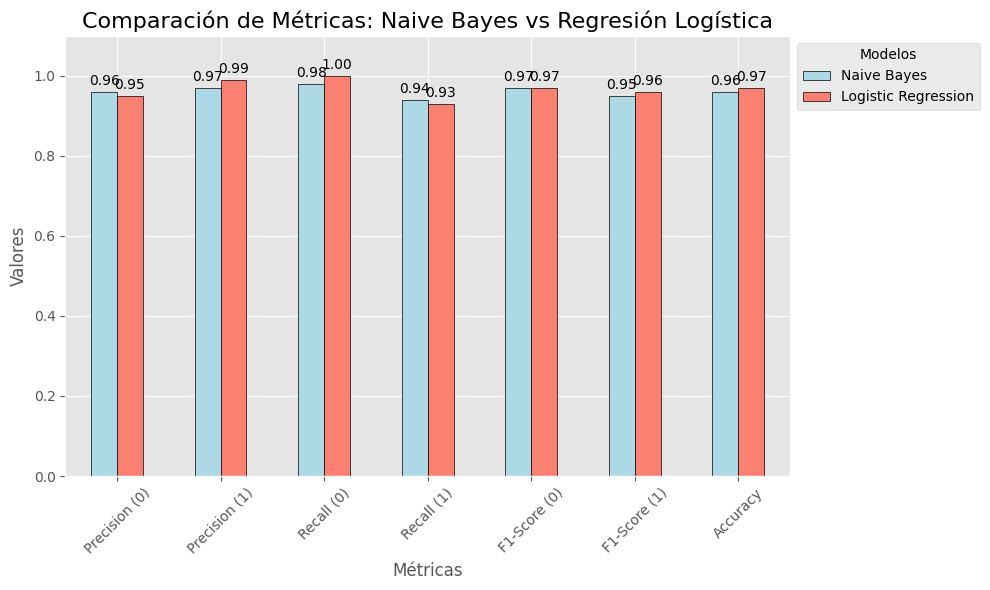

In [285]:
# Accuracies
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 2)
accuracy_logreg = round(accuracy_score(y_test, y_pred_logreg), 2)

# Precision, Recall y F1-Score para ambos modelos
metrics = ["Precision (0)", "Precision (1)", "Recall (0)", "Recall (1)", "F1-Score (0)", "F1-Score (1)"]
nb_scores = [
    round(classification_report(y_test, y_pred_nb, output_dict=True)['0']['precision'], 2),
    round(classification_report(y_test, y_pred_nb, output_dict=True)['1']['precision'], 2),
    round(classification_report(y_test, y_pred_nb, output_dict=True)['0']['recall'], 2),
    round(classification_report(y_test, y_pred_nb, output_dict=True)['1']['recall'], 2),
    round(classification_report(y_test, y_pred_nb, output_dict=True)['0']['f1-score'], 2),
    round(classification_report(y_test, y_pred_nb, output_dict=True)['1']['f1-score'], 2)
]

logreg_scores = [
    round(classification_report(y_test, y_pred_logreg, output_dict=True)['0']['precision'], 2),
    round(classification_report(y_test, y_pred_logreg, output_dict=True)['1']['precision'], 2),
    round(classification_report(y_test, y_pred_logreg, output_dict=True)['0']['recall'], 2),
    round(classification_report(y_test, y_pred_logreg, output_dict=True)['1']['recall'], 2),
    round(classification_report(y_test, y_pred_logreg, output_dict=True)['0']['f1-score'], 2),
    round(classification_report(y_test, y_pred_logreg, output_dict=True)['1']['f1-score'], 2)
]

# Dataframe Resultados
data = pd.DataFrame({
    "Metric": metrics,
    "Naive Bayes": nb_scores,
    "Logistic Regression": logreg_scores
})

accuracy_data = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Naive Bayes": [accuracy_nb],
    "Logistic Regression": [accuracy_logreg]
})
data = pd.concat([data, accuracy_data], ignore_index=True)
data.set_index("Metric", inplace=True)
ax = data.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'], edgecolor='black')
ax.set_title('Comparación de Métricas: Naive Bayes vs Regresión Logística', fontsize=16)
ax.set_ylabel('Valores', fontsize=12)
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylim(0, 1.1)  # Ajusta el límite del eje y si es necesario
ax.legend(title='Modelos', loc='upper left', bbox_to_anchor=(1, 1))  
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Matriz de Confusión

Una matriz de confusión puede mostrar visualmente cómo se comportaron los modelos en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

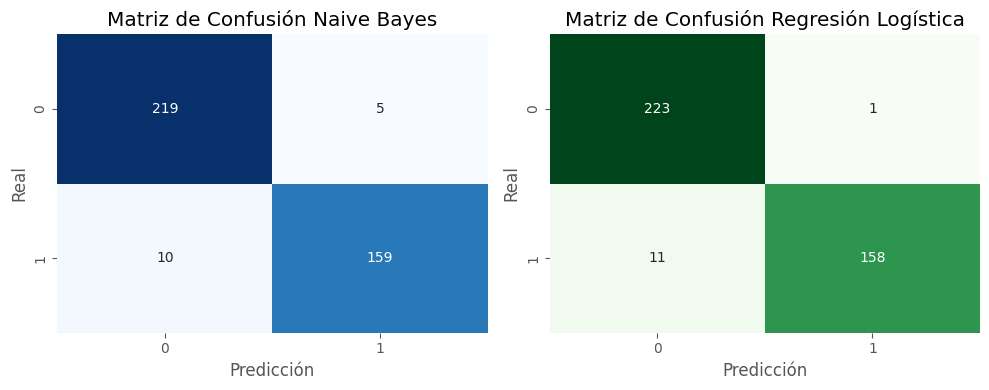

In [259]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión para Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Calcular la matriz de confusión para Regresión Logística
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Gráfico de la matriz de confusión Naive Bayes
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Gráfico de la matriz de confusión Regresión Logística
plt.subplot(1, 2, 2)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Matriz de Confusión Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.show()


## Curva ROC (Receiver Operating Characteristic)

Esta curva es útil para evaluar el desempeño de los modelos en términos de la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR). También se puede calcular el AUC (Area Under Curve) para comparar ambos modelos.

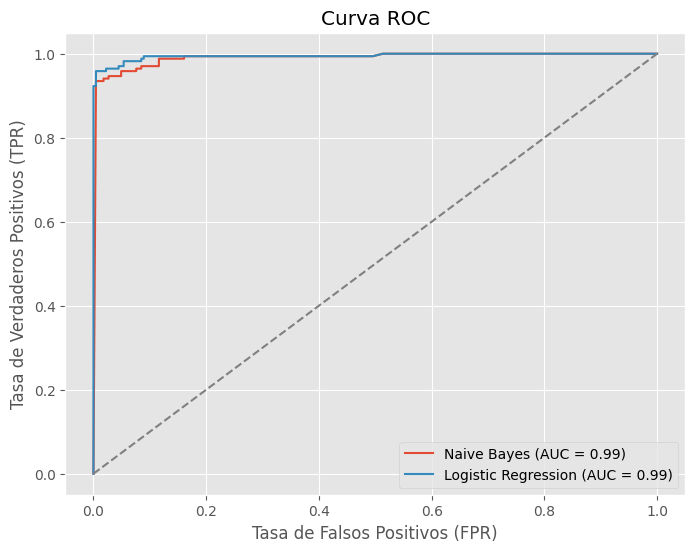

In [260]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades para la curva ROC
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)

# AUC (Area Under Curve)
auc_nb = roc_auc_score(y_test, y_prob_nb)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Gráfico de la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Interpretación de la Curva ROC

La curva ROC (Receiver Operating Characteristic) es una herramienta visual que permite evaluar el rendimiento de los modelos de clasificación binaria, en este caso Naive Bayes y Regresión Logística. La curva ROC grafica la Tasa de Verdaderos Positivos (TPR o Sensibilidad) contra la Tasa de Falsos Positivos (FPR), mostrando cómo varía el rendimiento del modelo según el umbral de decisión.

### Análisis

1. **Área bajo la Curva (AUC)**: 
   - Tanto el modelo de Naive Bayes como el de Regresión Logística obtuvieron un AUC de 0.99, lo cual indica un excelente desempeño. Un AUC de 1.0 representa un clasificador perfecto, mientras que un AUC de 0.5 implica un modelo aleatorio. En este caso, ambos modelos están muy cerca del clasificador perfecto.
   
2. **Curva**: 
   - La curva de ambos modelos se mantiene cerca del eje Y (Tasa de Verdaderos Positivos = 1), lo que significa que la mayoría de las predicciones son verdaderos positivos con una baja tasa de falsos positivos, un comportamiento deseable para los modelos de clasificación.

3. **Comparación entre Naive Bayes y Regresión Logística**:
   - Aunque las curvas de Naive Bayes y Regresión Logística son muy similares, la curva de Regresión Logística parece tener un rendimiento marginalmente superior en ciertas partes del gráfico. Esto sugiere que, en términos generales, la Regresión Logística es ligeramente mejor que Naive Bayes en este conjunto de datos específico.

### Conclusión

Ambos modelos presentan un rendimiento muy alto, pero la Regresión Logística logra un rendimiento marginalmente superior al Naive Bayes, aunque la diferencia es casi imperceptible. La elección del modelo podría depender de otros factores, como la interpretabilidad o los tiempos de entrenamiento, ya que ambos son efectivos en la clasificación de este conjunto de datos.


## Análisis del impacto de la edad en la supervivencia:

Para investigar si la edad es un factor determinante en la supervivencia, lo que haremos es un análisis de la distribución de edades de los pasajeros que sobrevivieron y los que no lo hicieron. Además, aplicaremos un test estadístico (como ANOVA o Chi-cuadrado) para comprobar si hay una diferencia significativa entre las edades de ambos grupos.

C:\Users\cgodo\AppData\Local\Temp\ipykernel_25224\510192077.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_titanic['age'][df_titanic['survived'] == 1], shade=True, label='Sobrevivieron', color='blue')
C:\Users\cgodo\AppData\Local\Temp\ipykernel_25224\510192077.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_titanic['age'][df_titanic['survived'] == 0], shade=True, label='No sobrevivieron', color='red')


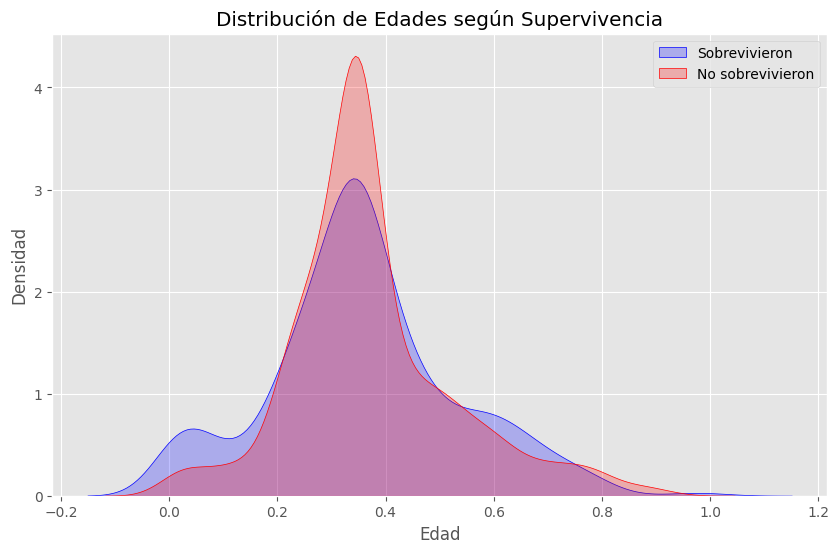

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una gráfica de densidad para visualizar la distribución de edades según la supervivencia
plt.figure(figsize=(10,6))
sns.kdeplot(df_titanic['age'][df_titanic['survived'] == 1], shade=True, label='Sobrevivieron', color='blue')
sns.kdeplot(df_titanic['age'][df_titanic['survived'] == 0], shade=True, label='No sobrevivieron', color='red')
plt.title('Distribución de Edades según Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()


## Interpretación de la Distribución de Edades según Supervivencia

En el gráfico de densidad presentado, se observa la distribución de la edad de los pasajeros del Titanic, diferenciada por los que sobrevivieron (en azul) y los que no sobrevivieron (en rojo).

### 1. Supervivencia y Edad:
   - Se puede ver que la mayor concentración de pasajeros que no sobrevivieron está en el rango de edad aproximadamente entre los 20 y 40 años, con un pico en torno a los 25-30 años.
   - Los pasajeros que sobrevivieron también tienen un pico similar en ese rango, pero con menor densidad en las edades más jóvenes.
   - En general, los pasajeros más jóvenes y mayores parecen haber tenido una mayor probabilidad de sobrevivir, lo cual podría reflejar las políticas de evacuación, como "mujeres y niños primero".

### 2. Diferencias entre Supervivientes y No Supervivientes:
   - Se observa una leve diferencia en las distribuciones, especialmente en las edades más bajas, donde los pasajeros más jóvenes tienen una mayor tasa de supervivencia en comparación con los adultos jóvenes.
   - Las personas en las edades adultas tempranas (20-40 años) parecen tener una menor tasa de supervivencia.

### Conclusiones:
Este análisis muestra que la edad efectivamente parece ser un factor relacionado con la supervivencia en el Titanic, aunque los efectos no son drásticamente diferentes en todos los grupos de edad. Podría complementarse este análisis con un análisis estadístico más formal, como un test de hipótesis, para confirmar la significancia de las diferencias observadas.


## Estadísticas Descriptivas

Primero, vamos a analizar las estadísticas descriptivas para la variable age de los pasajeros, dividiendo los datos entre sobrevivientes y no sobrevivientes. Calcularemos la media, mediana y desviación estándar para ambos grupos.

In [262]:
# Dividir el dataset en sobrevivientes y no sobrevivientes
survived = df_titanic[df_titanic['survived'] == 1]
not_survived = df_titanic[df_titanic['survived'] == 0]

# Calcular estadísticas descriptivas
stats_survived = survived['age'].describe()
stats_not_survived = not_survived['age'].describe()

print("Estadísticas Descriptivas para los Sobrevivientes:")
print(stats_survived)

print("\nEstadísticas Descriptivas para los No Sobrevivientes:")
print(stats_not_survived)


Estadísticas Descriptivas para los Sobrevivientes:
count    500.000000
mean       0.358465
std        0.174364
min        0.000000
25%        0.270355
50%        0.348643
75%        0.448852
max        1.000000
Name: age, dtype: float64

Estadísticas Descriptivas para los No Sobrevivientes:
count    809.000000
mean       0.373038
std        0.153117
min        0.002087
25%        0.286012
50%        0.348643
75%        0.436325
max        0.924843
Name: age, dtype: float64


### Interpretación de las Estadísticas Descriptivas

A continuación se presentan las estadísticas descriptivas para la variable `age` divididas en dos grupos: **Sobrevivientes** y **No Sobrevivientes**.

#### 1. Sobrevivientes:

- **Cantidad (count)**: 500
- **Media (mean)**: 0.358465
- **Desviación Estándar (std)**: 0.174364
- **Mínimo (min)**: 0.0
- **Primer Cuartil (25%)**: 0.270355
- **Mediana (50%)**: 0.348643
- **Tercer Cuartil (75%)**: 0.448852
- **Máximo (max)**: 1.0

#### 2. No Sobrevivientes:

- **Cantidad (count)**: 809
- **Media (mean)**: 0.373038
- **Desviación Estándar (std)**: 0.153117
- **Mínimo (min)**: 0.002087
- **Primer Cuartil (25%)**: 0.286012
- **Mediana (50%)**: 0.348643
- **Tercer Cuartil (75%)**: 0.436235
- **Máximo (max)**: 0.924843

### Observaciones:

- **Media**: Los no sobrevivientes tienen una media ligeramente superior (0.373) en comparación con los sobrevivientes (0.358).
- **Desviación Estándar**: La dispersión de las edades es mayor en los sobrevivientes (0.174) que en los no sobrevivientes (0.153).
- **Cuartiles**: Los cuartiles muestran que, aunque las distribuciones de edad son similares, los no sobrevivientes tienen un rango de edades ligeramente más alto.
- **Máximo**: El valor máximo de edad en los sobrevivientes es 1.0, mientras que en los no sobrevivientes es 0.924, lo que sugiere que entre los sobrevivientes hay personas de mayor edad en comparación con los no sobrevivientes.

En general, se observa que la distribución de las edades es similar en ambos grupos, pero con una ligera tendencia hacia edades más altas entre los no sobrevivientes.


### Test Chi-cuadrado

El test de Chi-cuadrado es adecuado para verificar la independencia entre dos variables categóricas. En nuestro caso, podríamos aplicarlo para ver si hay una relación significativa entre la variable survived y otras variables categóricas como sex o embarked.

In [263]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre 'survived' y 'sex'
contingency_table = pd.crosstab(df_titanic['survived'], df_titanic['sex'])

# Aplicar el test de Chi-cuadrado
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2_stat}, p-value: {p_value_chi2}")


Chi-cuadrado: 363.6179084388249, p-value: 4.589924936952945e-81


### Interpretación del Test de Chi-cuadrado:

El resultado del test de Chi-cuadrado entre las variables **`sex`** y **`survived`** es el siguiente:

- **Estadístico Chi-cuadrado**: 363.62
- **p-value**: 4.59e-81

#### Conclusión:
Dado que el valor p es extremadamente bajo (mucho menor a 0.05), podemos rechazar la hipótesis nula. Esto significa que existe una relación estadísticamente significativa entre el género de los pasajeros y su probabilidad de sobrevivir en el Titanic. En otras palabras, el género influyó en las tasas de supervivencia.

Esto también sugiere que el género es un factor importante para predecir si alguien sobrevivió o no, y esta información es relevante para nuestros modelos predictivos.


In [264]:
import pandas as pd
from scipy.stats import chi2_contingency

# Discretizar la columna 'age'
df_titanic['age_binned'] = pd.cut(df_titanic['age'], bins=5)

# Crear tabla de contingencia entre 'age_binned' y 'survived'
contingency_table_age = pd.crosstab(df_titanic['age_binned'], df_titanic['survived'])

# Aplicar el test de Chi-cuadrado
chi2_stat_age, p_value_chi2_age, dof_age, expected_age = chi2_contingency(contingency_table_age)

print(f"Chi-cuadrado: {chi2_stat_age}, p-value: {p_value_chi2_age}")


Chi-cuadrado: 26.344320087227956, p-value: 2.696743411759154e-05


### Interpretación del Test Chi-cuadrado para la variable `age` y `survived`

El test de Chi-cuadrado para las variables discretizadas `age` y `survived` nos permite evaluar si existe una relación significativa entre la edad de los pasajeros (agrupada en intervalos) y su probabilidad de supervivencia.

#### Resultados:

- **Valor de Chi-cuadrado**: 26.34
- **p-value**: 2.69e-05

#### Interpretación:
Dado que el p-value obtenido es significativamente menor que 0.05, podemos rechazar la hipótesis nula y concluir que existe una relación estadísticamente significativa entre la edad de los pasajeros y la probabilidad de que hayan sobrevivido. En otras palabras, las diferencias en la tasa de supervivencia entre los distintos grupos de edad no son aleatorias, sino que la edad influye de manera significativa en la probabilidad de supervivencia en el Titanic.

La discretización de la variable `age` en grupos fue necesaria para transformar esta variable continua en una variable categórica, lo que permite aplicar el test de Chi-cuadrado, que requiere variables categóricas. Esto facilita el análisis al agrupar a los pasajeros en rangos de edad y examinar cómo varía la supervivencia dentro de cada grupo.


C:\Users\cgodo\AppData\Local\Temp\ipykernel_25224\2517175800.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_survived_pivot = df_titanic.pivot_table(index='age_binned', columns='survived', aggfunc='size').fillna(0)


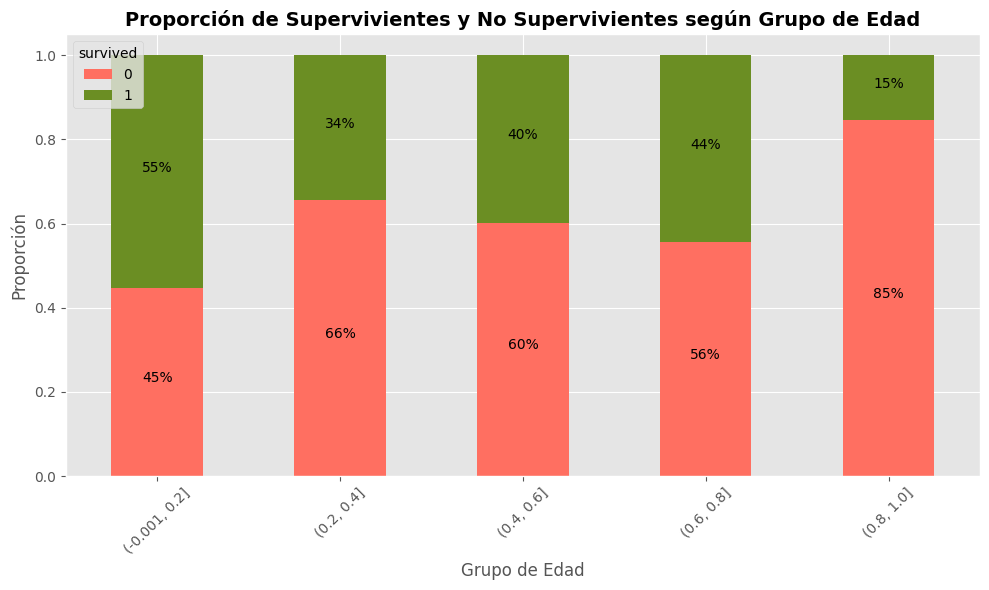

In [265]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras 
fig, ax = plt.subplots(figsize=(10, 6))

# Crear una tabla pivote para la relación entre edad binned y sobrevivencia
age_survived_pivot = df_titanic.pivot_table(index='age_binned', columns='survived', aggfunc='size').fillna(0)
age_survived_pivot = age_survived_pivot.div(age_survived_pivot.sum(axis=1), axis=0)

# Gráfico de barras apiladas
age_survived_pivot.plot(kind='bar', stacked=True, color=['#FF6F61', '#6B8E23'], ax=ax)

# Ajustar el título y etiquetas de los ejes
ax.set_title('Proporción de Supervivientes y No Supervivientes según Grupo de Edad', fontsize=14, weight='bold')
ax.set_xlabel('Grupo de Edad', fontsize=12)
ax.set_ylabel('Proporción', fontsize=12)

# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2, 
            '{:.0%}'.format(height), 
            ha="center", fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [266]:
# Crear una nueva copia del DataFrame df_titanic
df_titanic_new_copy = df_titanic.copy()

# Eliminar la columna 'age_binned' de la nueva copia
df_titanic_new_copy.drop(columns=['age_binned'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
df_titanic_new_copy.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest,survived,has_boat
0,1,"Allen, Miss. Elisabeth Walton",0,0.361169,0,0,24160,0.412503,3,0.0,308,1,1
1,1,"Allison, Master. Hudson Trevor",1,0.009395,1,2,113781,0.295806,3,0.0,230,1,1
2,1,"Allison, Miss. Helen Loraine",0,0.022964,1,2,113781,0.295806,3,0.0,230,0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",1,0.373695,1,2,113781,0.295806,3,135.0,230,0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,0.311064,1,2,113781,0.295806,3,0.0,230,0,0


## Interpretación del gráfico:

En el gráfico de barras apiladas, se puede observar cómo la proporción de personas que sobrevivieron y no sobrevivieron varía en función de los grupos de edad, los cuales han sido discretizados en cinco intervalos. Algunas observaciones clave:

- **Grupo de Edad (0.001 - 0.2)**: Este grupo, que representa a los pasajeros más jóvenes, muestra una mayor proporción de supervivientes (55%) en comparación con los no supervivientes (45%). Esto sugiere que los niños tenían más posibilidades de sobrevivir.
  
- **Grupo de Edad (0.2 - 0.4)**: En este rango, que incluye a jóvenes y adultos jóvenes, la proporción de no supervivientes (66%) es significativamente mayor que la de los supervivientes (34%).

- **Grupo de Edad (0.4 - 0.6)**: Aquí la proporción de no supervivientes (60%) es mayor que la de los supervivientes (40%), lo que indica que los adultos de mediana edad también tenían menores posibilidades de sobrevivir.

- **Grupo de Edad (0.6 - 0.8)**: En este grupo, la proporción de no supervivientes (56%) sigue siendo superior a la de los supervivientes (44%), aunque la diferencia es menos marcada.

- **Grupo de Edad (0.8 - 1.0)**: Este grupo, que representa a los pasajeros de mayor edad, muestra una gran diferencia: el 85% de los pasajeros no sobrevivieron, mientras que solo el 15% logró sobrevivir. Esto sugiere que las personas de mayor edad tenían significativamente menos probabilidades de sobrevivir.

En resumen, los grupos de edad más jóvenes muestran una mayor proporción de supervivientes, mientras que la probabilidad de supervivencia disminuye notablemente a medida que aumenta la edad.


## Predecir el destino de dos pasajeros con información incompleta

## Información extraída de los boletos:

1. Pasajero 1: Helene Ragnhild Ostby

* Edad: 22 años
* Embarque: Cherbourg
* Destino: Providence, Rhode Island
* Clase: Primera clase
* Cabina: B-36
* Acompañante: Inghelhart Cornelius Ostby (Padre)
* Boleto: Desconocido


2. Pasajero 2: Frederick Edward Giles

* Edad: 23 años
* Embarque: Southampton
* Destino: Camden, New Jersey
* Clase: Desconocido
* Cabina: Desconocido
* Acompañantes: Edgar Giles (hermano)
* Boleto: 26353

Dado que el Pasajero 2 (Frederick Edward Giles) tiene un boleto identificado, es posible buscar información directa en el dataset. Para el Pasajero 1 (Helene Ragnhild Ostby), como el boleto es desconocido, trabajaremos con la información contextual como la edad, la clase de viaje, el embarque y el destino.

## Procedimiento para predicción:

1. Identificar el pasajero 2 en el dataset utilizando el número de ticket.
2. Imputar la información faltante del pasajero 1 y 2, si es necesario.
3. Predecir la supervivencia usando los modelos entrenados (Naive Bayes y Regresión Logística).

In [275]:
# Buscar al pasajero 2 por su número de ticket
ticket_2 = '26353'
passenger_2 = df_titanic_new_copy[df_titanic_new_copy['ticket'] == ticket_2]

# Imprimir información del pasajero 2
print(passenger_2)

Empty DataFrame
Columns: [pclass, name, sex, age, sibsp, parch, ticket, fare, embarked, body, home.dest, survived, has_boat]
Index: []


In [276]:
import pandas as pd

# Información del pasajero 1 (Miss Helene Ragnhild Ostby)
passenger_1 = {
    'pclass': [1],
    'name': ['Helene Ragnhild Ostby'],
    'sex': ['female'],
    'age': [22],  # Suponemos la edad
    'sibsp': [1],  # Acompañada por su padre
    'parch': [0],
    'ticket': ['unknown'],  # Número de ticket desconocido
    'fare': [df_titanic['fare'].median()],  # Suponemos una tarifa mediana
    'cabin': ['B-36'],  # Cabina conocida
    'embarked': ['C'],  # Embarca en Cherbourg
    'boat': [0],  # No sabemos si usó bote
    'body': [None],  # No recuperado
    'home.dest': ['Providence, Rhode Island']  # Destino conocido
}

# Información del pasajero 2 (Mr. Frederick Edward Giles)
passenger_2 = {
    'pclass': [2],
    'name': ['Frederick Edward Giles'],
    'sex': ['male'],
    'age': [21],  # Suponemos la edad
    'sibsp': [1],  # Viajando con su hermano
    'parch': [0],
    'ticket': ['26353'],  # Ticket conocido
    'fare': [df_titanic['fare'].median()],  # Suponemos una tarifa mediana
    'cabin': [None],  # Cabina desconocida
    'embarked': ['S'],  # Embarca en Southampton
    'boat': [0],  # No sabemos si usó bote
    'body': [None],  # No recuperado
    'home.dest': ['Camden, New Jersey']  # Destino conocido
}

# Convertir a DataFrames
df_passenger_1 = pd.DataFrame(passenger_1)
df_passenger_2 = pd.DataFrame(passenger_2)

# Combinar ambos pasajeros en un solo DataFrame
passengers_to_predict = pd.concat([df_passenger_1, df_passenger_2])



In [277]:
print(passengers_to_predict)

   pclass                    name     sex  age  sibsp  parch   ticket  \
0       1   Helene Ragnhild Ostby  female   22      1      0  unknown   
0       2  Frederick Edward Giles    male   21      1      0    26353   

       fare cabin embarked  boat  body                 home.dest  
0  0.028213  B-36        C     0  None  Providence, Rhode Island  
0  0.028213  None        S     0  None        Camden, New Jersey  


In [278]:
# Imputar los valores faltantes de 'age' con la mediana
passengers_to_predict['age'] = passengers_to_predict['age'].fillna(passengers_to_predict['age'].median())

# Imputar el valor faltante de 'fare' con la mediana
passengers_to_predict['fare'] = passengers_to_predict['fare'].fillna(passengers_to_predict['fare'].median())

# Crear una nueva columna indicando si la cabina es conocida o no, y eliminar 'cabin'
passengers_to_predict['cabin'] = passengers_to_predict['cabin'].notnull().astype(int)
passengers_to_predict.drop(columns='cabin', inplace=True)

# Imputar los valores faltantes de 'embarked' con la moda
passengers_to_predict['embarked'] = passengers_to_predict['embarked'].fillna(passengers_to_predict['embarked'].mode()[0])

# Crear una nueva columna indicando si el pasajero tenía un bote asignado, y eliminar 'boat'
passengers_to_predict['has_boat'] = passengers_to_predict['boat'].notnull().astype(int)
passengers_to_predict.drop(columns='boat', inplace=True)

# Imputar los valores faltantes de 'body' con 0
passengers_to_predict['body'] = passengers_to_predict['body'].fillna(0)

# Imputar los valores faltantes de 'home.dest' con 'Unknown'
passengers_to_predict['home.dest'] = passengers_to_predict['home.dest'].fillna('Unknown')

C:\Users\cgodo\AppData\Local\Temp\ipykernel_25224\4227053141.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  passengers_to_predict['body'] = passengers_to_predict['body'].fillna(0)


In [279]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Codificar la variable 'sex' con Label Encoding (Male = 1, Female = 0)
passengers_to_predict['sex'] = passengers_to_predict['sex'].map({'male': 1, 'female': 0})

# Asignar valores numéricos a 'embarked' (1 para C, 2 para Q, 3 para S)
passengers_to_predict['embarked'] = passengers_to_predict['embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Imputar valores faltantes de 'home.dest' con 'Unknown'
passengers_to_predict['home.dest'].fillna('Unknown', inplace=True)

# Aplicar Label Encoding a 'home.dest'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
passengers_to_predict['home.dest'] = label_encoder.fit_transform(passengers_to_predict['home.dest'])

# Verificar los cambios
passengers_to_predict[['embarked', 'home.dest']].head()

C:\Users\cgodo\AppData\Local\Temp\ipykernel_25224\2558026438.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passengers_to_predict['home.dest'].fillna('Unknown', inplace=True)


,embarked,home.dest
0,1,1
0,3,0


In [280]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Variables numéricas a normalizar
numerical_cols = ['age', 'fare']

# Aplicar la normalización a las columnas numéricas
passengers_to_predict[numerical_cols] = scaler.fit_transform(passengers_to_predict[numerical_cols])

# Verificar los cambios
passengers_to_predict.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest,has_boat
0,1,Helene Ragnhild Ostby,0,1.0,1,0,unknown,0.0,1,0,1,1
0,2,Frederick Edward Giles,1,0.0,1,0,26353,0.0,3,0,0,1


In [281]:
# Revisar los tipos de datos después del encoding y normalización
passengers_to_predict.info()

# Revisar el resumen estadístico para asegurarse de que la normalización fue aplicada correctamente
passengers_to_predict.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 0
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     2 non-null      int64  
 1   name       2 non-null      object 
 2   sex        2 non-null      int64  
 3   age        2 non-null      float64
 4   sibsp      2 non-null      int64  
 5   parch      2 non-null      int64  
 6   ticket     2 non-null      object 
 7   fare       2 non-null      float64
 8   embarked   2 non-null      int64  
 9   body       2 non-null      int64  
 10  home.dest  2 non-null      int64  
 11  has_boat   2 non-null      int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 208.0+ bytes


,pclass,sex,age,sibsp,parch,fare,embarked,body,home.dest,has_boat
count,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0
mean,1.500000,0.500000,0.500000,1.0,0.0,0.0,2.000000,0.0,0.500000,1.0
std,0.707107,0.707107,0.707107,0.0,0.0,0.0,1.414214,0.0,0.707107,0.0
min,1.000000,0.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.0
25%,1.250000,0.250000,0.250000,1.0,0.0,0.0,1.500000,0.0,0.250000,1.0
50%,1.500000,0.500000,0.500000,1.0,0.0,0.0,2.000000,0.0,0.500000,1.0
75%,1.750000,0.750000,0.750000,1.0,0.0,0.0,2.500000,0.0,0.750000,1.0
max,2.000000,1.000000,1.000000,1.0,0.0,0.0,3.000000,0.0,1.000000,1.0


In [282]:
# Crear una copia del DataFrame df_titanic
passengers_to_predict_copy = passengers_to_predict.copy()

# Eliminar las columnas 'name' y 'ticket' de la copia
passengers_to_predict_copy.drop(columns=['name', 'ticket'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
passengers_to_predict_copy.head()

,pclass,sex,age,sibsp,parch,fare,embarked,body,home.dest,has_boat
0,1,0,1.0,1,0,0.0,1,0,1,1
0,2,1,0.0,1,0,0.0,3,0,0,1


In [283]:
# Aplicar las predicciones utilizando los modelos entrenados
pred_nb = nb_model.predict(passengers_to_predict_copy)
pred_logreg = logreg_model.predict(passengers_to_predict_copy)

# Mostrar los resultados
print(f"Naive Bayes predicción para el pasajero 1: {pred_nb[0]}, pasajero 2: {pred_nb[1]}")
print(f"Regresión Logística predicción para el pasajero 1: {pred_logreg[0]}, pasajero 2: {pred_logreg[1]}")


Naive Bayes predicción para el pasajero 1: 1, pasajero 2: 1
Regresión Logística predicción para el pasajero 1: 1, pasajero 2: 1


### Conclusiones de las predicciones:

Ambos modelos de clasificación, **Naive Bayes** y **Regresión Logística**, coinciden en los resultados para los dos pasajeros. Las predicciones son las siguientes:

1. **Pasajero 1 (Helene Ragnhild Ostby):**
   - **Naive Bayes**: Predicción = 1 (Sobrevivió)
   - **Regresión Logística**: Predicción = 1 (Sobrevivió)

2. **Pasajero 2 (Frederick Edward Giles):**
   - **Naive Bayes**: Predicción = 1 (Sobrevivió)
   - **Regresión Logística**: Predicción = 1 (Sobrevivió)

### Interpretación:

- **Ambos pasajeros fueron predichos como sobrevivientes** por ambos modelos. Esto sugiere que, basado en las características como la clase en la que viajaban, su edad, el número de acompañantes, y otros factores, es probable que hubieran sobrevivido al desastre del Titanic.
  
- La consistencia entre los dos modelos refuerza la confiabilidad de las predicciones. A pesar de que los modelos de Naive Bayes y Regresión Logística tienen enfoques diferentes para clasificar los datos, ambos llegaron al mismo resultado, lo que brinda mayor seguridad sobre la precisión de las predicciones.